<a href="https://colab.research.google.com/github/umeshrawat/shopAssist/blob/feature%2FDataAnalysis/Copy_of_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval-Augmented Shopping Assistant - EDA

This notebook explores the ABO dataset for initial insights.

In [1]:
import pandas as pd
import json
import zipfile

In [18]:
# Path to your zip file
zip_path = '/content/sample_data/listings.zip'

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files inside the zip
    zip_ref.extractall('/content/sample_data/')




In [19]:
# Preview

import json
import pandas as pd
def load_json_from_folder(file_name):
  valid_data=[]

  # Load your JSON (string or from a file)
  with open(file_name, 'r', encoding='utf-8') as f:
    for line in f:
      try:
        data = json.loads(line)
        valid_data.append(data)
      except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
  return valid_data

In [22]:
import os
json_file_path = '/content/sample_data/listings/metadata'
extracted_data=[]
for filename in os.listdir(json_file_path):
  if filename.endswith('.json'):
    file_path = os.path.join(json_file_path, filename)
    valid_data=load_json_from_folder(file_path)
    extracted_data.extend(valid_data)

Error decoding JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)
Error decoding JSON: Extra data: line 1 column 12 (char 11)
Error decoding JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 10)
Error decoding JSON: Extra data: line 1 column 27 (char 26)
Error decoding JSON: Extra data: line 1 column 20 (char 19)
Error decoding JSON: Expecting value: line 1 column 9 (char 8)
Error decoding JSON: Expecting value: line 1 column 5 (char 4)
Error decoding JSON: Extra data: line 1 column 19 (char 18)
Error decoding JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 10)
Error decoding JSON: Extra data: line 1 column 27 (char 26)
Error decoding JSON: Extra data: line 1 column 20 (char 19)
Error decoding JSON: Expecting value: line 1 column 9 (char 8)
Error decoding JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 10)
Error decoding JSON: Extra data: line 1 column 27 (char 26)


In [24]:

def remove_language_tag(obj):
    """Recursively remove 'language_tag' keys from nested dicts and lists."""
    if isinstance(obj, dict):
        return {k: remove_language_tag(v) for k, v in obj.items() if k != "language_tag"}
    elif isinstance(obj, list):
        return [remove_language_tag(item) for item in obj]
    else:
        return obj


In [28]:
cleaned_data = []
# with open("/content/sample_data/listings_1.json", "r", encoding="utf-8") as f:
for line in extracted_data:
    # data = json.loads(line)
    cleaned = remove_language_tag(line)
    cleaned_data.append(cleaned)
cleaned_data[0]

{'brand': [{'value': 'Amazon Brand - Solimo'}],
 'bullet_point': [{'value': '3D Printed Hard Back Case Mobile Cover for Lenovo K4 Note'},
  {'value': 'Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.'},
  {'value': 'Stylish design and appearance, express your unique personality.'},
  {'value': 'Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface.'},
  {'value': 'Slim Hard Back Cover'},
  {'value': 'No Warranty'},
  {'value': 'None'}],
 'color': [{'standardized_values': ['multi-colored'], 'value': 'Others'}],
 'item_id': 'B07T6RZ2CM',
 'item_name': [{'value': 'Amazon Brand - Solimo Designer Couples Sitting at Dark 3D Printed Hard Back Case Mobile Cover for Lenovo K4 Note'}],
 'item_weight': [{'normalized_value': {'unit': 'pounds', 'value': 0.110231131},
   'unit': 'grams',
   'value': 50}],
 'model_name': [{'value': 'Lenovo K4 Note'}],
 'model_number': [{'value

In [26]:
def flatten_record(record):
    flat = {}
    for key, value in record.items():
        if isinstance(value, list) and all(isinstance(v, dict) and "value" in v for v in value):
            # Join multiple values with comma
            flat[key] = ", ".join(str(v["value"]) for v in value)
        else:
            flat[key] = value
    return flat

In [30]:
# Apply to all records
flattened = [flatten_record(rec) for rec in cleaned_data if isinstance(rec, dict)]

# Convert to DataFrame
df = pd.DataFrame(flattened)
df.to_csv('sample_data/shopAssist_Ori.csv', index=False)
df.iloc[:, 25:]

,spin_id,model_year,3dmodel_id
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
147697,NaN,NaN,NaN
147698,NaN,2019,NaN
147699,d5713c6e,NaN,NaN
147700,NaN,NaN,NaN


In [31]:
df.drop(columns=['item_id','model_number','main_image_id','other_image_id', 'domain_name', 'model_year','spin_id','3dmodel_id','finish_type','pattern'],inplace=True)


In [ ]:
df.describe()

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 62.8 MB/s eta 0:00:00


In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from re import S
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

#store df into csv file
df.to_csv('sample_data/shopAssist.csv', index=False)
#read file from sample_data
df_file = pd.read_csv('sample_data/shopAssist.csv')
#combined all the columns into one
df['combined'] = df_file.apply(lambda x: ' '.join(x.astype(str)), axis=1)
print (df['combined'][0])

#Generate embeddings



Amazon Brand - Solimo 3D Printed Hard Back Case Mobile Cover for Coolpad Cool1 dual, Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports., Stylish design and appearance, express your unique personality., Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface., Slim Hard Back Cover, No Warranty Others Amazon Brand - Solimo Designer Leafs 3D Printed Hard Back Case Mobile Cover for Coolpad Cool1 Dual 50.0 Coolpad Cool1 dual CELLULAR_PHONE_CASE mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, hard case, 3D printed mobile cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, hard case, 3D printed mobile cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, hard case, 3D printed mobile cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, hard case, 3D 

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(df['combined'], convert_to_tensor=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

In [ ]:
def search(query, top_k=2):
    query_vector = model.encode([query])
    distances, indices = index.search(query_vector, top_k)
    df = pd.read_csv('sample_data/shopAssist_Ori.csv')
    return df.iloc[indices[0]]

In [ ]:
result_df = search("Sterling Silver")
images_df = pd.read_csv('sample_data/images.csv')
image_id = result_df['main_image_id'].tolist()
# image_mapping = images_df.set_index('image_id')['path'].to_dict()
image_mapping = images_df[images_df['image_id'].isin(image_id)]['path'].tolist()
for i, (idx,row) in enumerate(result_df.iterrows()):
    result_df['main_image_id'] = "sample_data/"+ image_mapping[i]
result_df
#Map each image_id to its path and prepend "sample_data/"
# result_df['main_image_id'] = result_df['main_image_id'].map(lambda x: f"sample_data/{image_mapping.get(x)}")
# result_df['main_image_id']

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,main_image_id,...,style,item_dimensions,model_year,color_code,fabric_type,spin_id,3dmodel_id,finish_type,product_description,pattern
2112,Amazon Collection,Sterling silver necklace with cross pendant fe...,White,B00HA6BLUA,Men's Sterling Silver Solid Polished Cross wit...,NaN,NaN,AMZ262MC,FINENECKLACEBRACELETANKLET,sample_data/51/519a3e44.jpg,...,NaN,{'height': {'normalized_value': {'unit': 'inch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,Amazon Collection,Sterling silver necklace featuring unicorn pen...,White,B01B01F43A,Carnevale Sterling Silver Unicorn Made with Sw...,0.02,NaN,SM5449CYBCAM,FINENECKLACEBRACELETANKLET,sample_data/51/519a3e44.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


12/12d03bf2.jpg


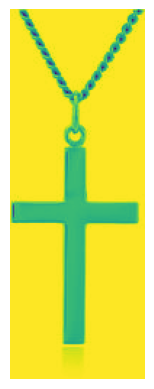

51/519a3e44.jpg


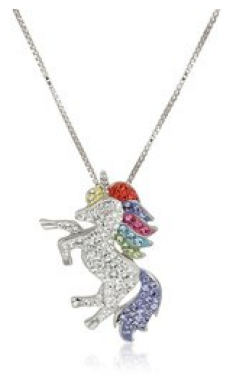

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for url in image_mapping:
  print(url)
  image_path = "sample_data/"+url
  img = mpimg.imread(image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:

result_df.to_json(orient='records').replace("\'", "'")

'[{"brand":"Amazon Collection","bullet_point":"Sterling silver necklace with cross pendant featuring die-struck Lord\'s Prayer message, Solid heavy weight cross with rhodium plated stainless steel chain for every day use, Rhodium plated to prevent tarnishing, Hand crafted in the USA, These silver pieces are built for longevity. This piece features a metal plating or flashing, or an electrocoating for a more lustrous appearance, but it can wear off with long-term or heavy use. To ensure the longevity of your plated items store your jewelry in a dark, cool, dry place such as a pouch or air tight box and avoid rubbing plated items together.\\u00a0Also try to avoid exposure to cleaning products and perfume which can both negatively affect your items. Your local jeweler can advise you where to send your jewelry if you would ever like them replated., Made in United States","color":"White","item_id":"B00HA6BLUA","item_name":"Men\'s Sterling Silver Solid Polished Cross with Lord\'s Prayer Insc